Model Training

1.1 Import Data and Required Packages

Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [2]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

Import the CSV Data as Pandas DataFrame

In [3]:
df = pd.read_csv('data/raw.csv')

Show Top 5 Records

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


Preparing X and Y variables

In [6]:
X = df.drop(columns=['math score'],axis=1)

In [7]:
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,male,group A,high school,standard,completed,67,63
1,female,group D,some high school,free/reduced,none,59,55
2,male,group E,some college,free/reduced,none,60,50
3,male,group B,high school,standard,none,78,68
4,male,group E,associate's degree,standard,completed,73,68


In [8]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race/ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test preparation course'].unique())

Categories in 'gender' variable:      ['male' 'female']
Categories in 'race_ethnicity' variable:   ['group A' 'group D' 'group E' 'group B' 'group C']
Categories in'parental level of education' variable: ['high school' 'some high school' 'some college' "associate's degree"
 "bachelor's degree" "master's degree"]
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['completed' 'none']


In [9]:
y = df['math score']
y

0      67
1      40
2      59
3      77
4      78
       ..
994    73
995    85
996    32
997    73
998    65
Name: math score, Length: 999, dtype: int64

In [10]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [11]:
X = preprocessor.fit_transform(X)

In [12]:
X.shape

(999, 19)

In [13]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((799, 19), (200, 19))

Create an Evaluate Function to give all metrics after model Training

In [14]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [15]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.5299
- Mean Absolute Error: 4.4621
- R2 Score: 0.8702
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.4930
- Mean Absolute Error: 4.4713
- R2 Score: 0.8732


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.8552
- Mean Absolute Error: 5.4389
- R2 Score: 0.8005
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.8344
- Mean Absolute Error: 5.4123
- R2 Score: 0.8038


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.5270
- Mean Absolute Error: 4.4547
- R2 Score: 0.8703
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.5200
- Mean Absolute Error: 4.4980
- R2 Score: 0.8720


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.8691
- Mean Absolute Error: 4.6538
- R2 Score: 0.8537
-----------------------

Results

In [16]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
0,Linear Regression,0.873245
2,Ridge,0.871997
7,CatBoosting Regressor,0.850938
5,Random Forest Regressor,0.834126
8,AdaBoost Regressor,0.816154
1,Lasso,0.803778
6,XGBRegressor,0.802274
3,K-Neighbors Regressor,0.786823
4,Decision Tree,0.667035


Linear Regression

In [17]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 87.32


Plot y_pred and y_test

Text(0, 0.5, 'Predicted')

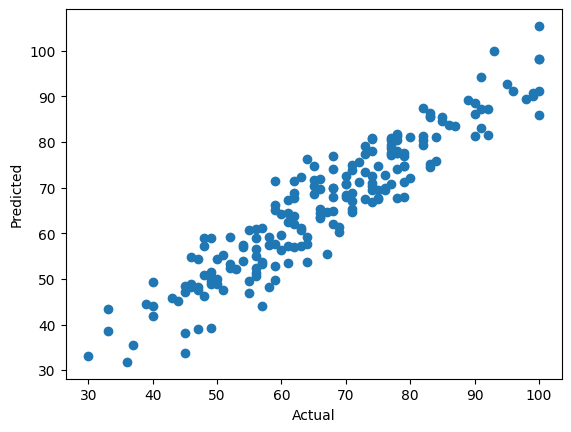

In [18]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='math score'>

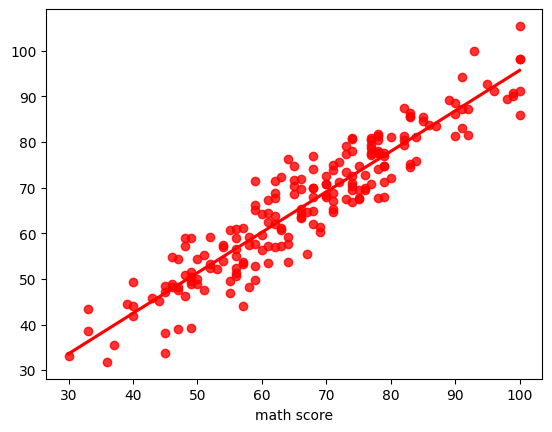

In [19]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red')

Difference between Actual and Predicted Values

In [20]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
453,59,49.843750,9.156250
793,62,67.703125,-5.703125
209,64,59.140625,4.859375
309,79,77.625000,1.375000
740,52,59.218750,-7.218750
...,...,...,...
78,78,81.421875,-3.421875
29,33,43.343750,-10.343750
277,72,75.656250,-3.656250
261,39,44.453125,-5.453125
